In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import matplotlib.ticker as ticker

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Visualization

In [0]:
data=pd.read_csv('/content/drive/My Drive/pTSAFinalProject/ShanghaiPM20100101_20151231.csv')

In [0]:
data=data[['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws','precipitation']]
data.columns

Index(['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation'], dtype='object')

In [0]:
data.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [0]:
print('missing humidity',len(data[data['HUMI'].isnull()]))

missing humidity 13


In [0]:
data=data[data['HUMI'].notnull()]

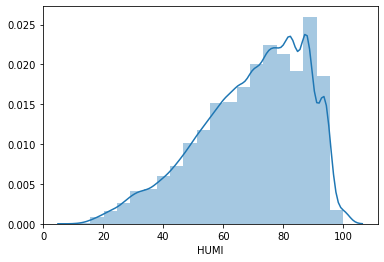

In [0]:
sns.distplot(data['HUMI'],bins=20)

In [0]:
data['HUMI'].describe()

count    52571.000000
mean        69.545646
std         17.658942
min         11.320000
25%         57.930000
50%         72.420000
75%         83.370000
max        100.000000
Name: HUMI, dtype: float64

In [0]:
for i in ['DEWP', 'PRES', 'TEMP', 'cbwd', 'Iws','precipitation']:
    if len(data[data[i].isnull()])>0:
      print(i, len(data[data[i].isnull()]))

In [0]:
data[data['PRES'].isnull()]

,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,SE,NE,SW,NW


In [0]:
data['precipitation']=data['precipitation'].fillna(0)

In [0]:
data['precipitation']=data['precipitation'].fillna(0)
mean=data['PRES'].mean()
data['PRES']= data['PRES'].fillna(mean)
data['SE']=np.array(data['cbwd']=='SE').astype(int)
data['NE']=np.array(data['cbwd']=='NE').astype(int)
data['SW']=np.array(data['cbwd']=='SW').astype(int)
data['NW']=np.array(data['cbwd']=='NW').astype(int)

In [0]:
list(data.columns)

['DEWP',
 'HUMI',
 'PRES',
 'TEMP',
 'cbwd',
 'Iws',
 'precipitation',
 'SE',
 'NE',
 'SW',
 'NW']

In [0]:
data=data.drop(['cbwd'],1)

In [0]:
data.corr(method='spearman')
data.corr()

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,SE,NE,SW,NW
DEWP,1.000000,0.431864,-0.854348,0.890418,0.008583,0.080728,0.215926,-0.091823,0.109170,-0.209996
HUMI,0.431864,1.000000,-0.231780,-0.017044,0.043268,0.138903,0.020866,0.066294,-0.103263,-0.048051
PRES,-0.854348,-0.231780,1.000000,-0.840604,0.015453,-0.084059,-0.222647,0.192602,-0.180288,0.146663
TEMP,0.890418,-0.017044,-0.840604,1.000000,-0.016088,0.028509,0.222765,-0.138341,0.176094,-0.201647
Iws,0.008583,0.043268,0.015453,-0.016088,1.000000,0.034890,0.019124,0.154774,-0.142292,-0.026435
precipitation,0.080728,0.138903,-0.084059,0.028509,0.034890,1.000000,-0.019315,0.042386,-0.020716,-0.007749
SE,0.215926,0.020866,-0.222647,0.222765,0.019124,-0.019315,1.000000,-0.486764,-0.229875,-0.299078
NE,-0.091823,0.066294,0.192602,-0.138341,0.154774,0.042386,-0.486764,1.000000,-0.278368,-0.362169
SW,0.109170,-0.103263,-0.180288,0.176094,-0.142292,-0.020716,-0.229875,-0.278368,1.000000,-0.171035
NW,-0.209996,-0.048051,0.146663,-0.201647,-0.026435,-0.007749,-0.299078,-0.362169,-0.171035,1.000000


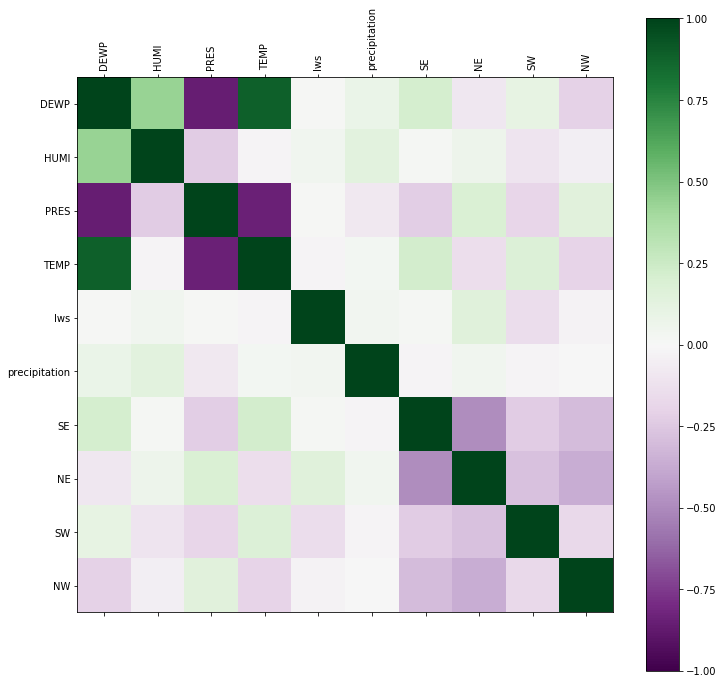

In [0]:
# Correlations among columns
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),interpolation='nearest',vmax=1,vmin=-1,cmap='PRGn')
# ax.title('corr', size=15)
ax.set_xticklabels(['']+list(data.columns), rotation=90)
ax.set_yticklabels(['']+list(data.columns))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.colorbar(cax)
plt.show()

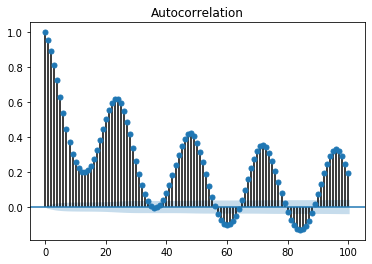

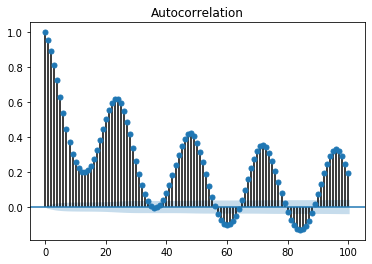

In [0]:
plot_acf(data['HUMI'], lags=100)

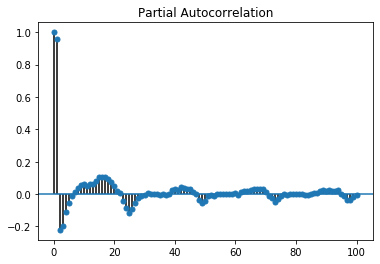

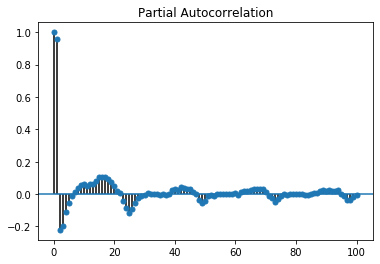

In [0]:
plot_pacf(data['HUMI'], lags=100)

In [0]:
data.columns

Index(['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'SE', 'NE',
       'SW', 'NW'],
      dtype='object')

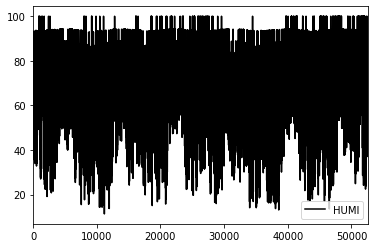

In [0]:
data['HUMI'].plot(color='black', legend=True)

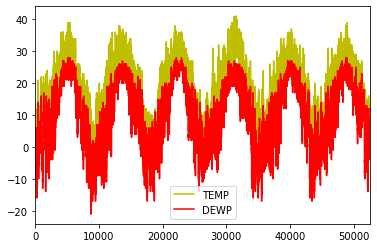

In [0]:
data['TEMP'].plot(color='y', legend=True)
data['DEWP'].plot(color='r', legend=True)

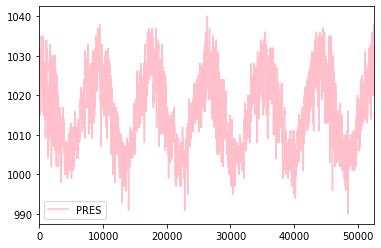

In [0]:
data['PRES'].plot(color='pink', legend=True)

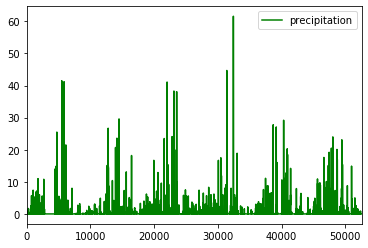

In [0]:
data['precipitation'].plot(color='g', legend=True)

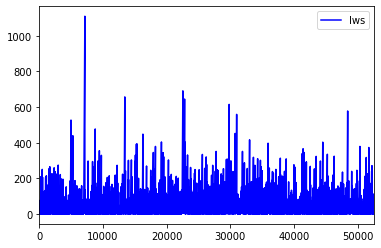

In [0]:
data['Iws'].plot(color='b', legend=True)

# Linear Regression

In [0]:
df=pd.read_csv('/content/drive/My Drive/TimeSeriesProject/ShanghaiPM20100101_20151231.csv')

In [0]:
df

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0
52582,52583,2015,12,31,22,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0


In [0]:
df=df[df['HUMI'].notnull()]

In [0]:
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
X_train = train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_train = train_df['HUMI']

In [0]:
X_val = val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_val = val_df['HUMI']
X_test = test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_test = test_df['HUMI']

In [0]:
X_train['precipitation']=X_train['precipitation'].fillna(0)
mean=X_train['PRES'].mean()
X_train['PRES']= X_train['PRES'].fillna(mean)
X_train['SE']=np.array(X_train['cbwd']=='SE').astype(int)
X_train['NE']=np.array(X_train['cbwd']=='NE').astype(int)
X_train['SW']=np.array(X_train['cbwd']=='SW').astype(int)
X_train['NW']=np.array(X_train['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_val['precipitation']=X_val['precipitation'].fillna(0)
mean=X_val['PRES'].mean()
X_val['PRES']= X_val['PRES'].fillna(mean)
X_val['SE']=np.array(X_val['cbwd']=='SE').astype(int)
X_val['NE']=np.array(X_val['cbwd']=='NE').astype(int)
X_val['SW']=np.array(X_val['cbwd']=='SW').astype(int)
X_val['NW']=np.array(X_val['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_test['precipitation']=X_test['precipitation'].fillna(0)
mean=X_test['PRES'].mean()
X_test['PRES']= X_test['PRES'].fillna(mean)
X_test['SE']=np.array(X_test['cbwd']=='SE').astype(int)
X_test['NE']=np.array(X_test['cbwd']=='NE').astype(int)
X_test['SW']=np.array(X_test['cbwd']=='SW').astype(int)
X_test['NW']=np.array(X_test['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_train=X_train.drop(['cbwd'],1)
X_val=X_val.drop(['cbwd'],1)
X_test=X_test.drop(['cbwd'],1)

In [0]:
X_train=X_train.drop(['PRES','TEMP'],1)
X_val=X_val.drop(['PRES','TEMP'],1)
X_test=X_test.drop(['PRES','TEMP'],1)

In [0]:
from sklearn.linear_model import Ridge
trainscore=[]
valscore=[]
for i in [0.01,0.001,0.0001,0.00001,0.000001,0.0000001,10**-8,10**-10,10**-12]:
  model=Ridge(alpha=i,normalize=True)
  model.fit(X_train,y_train)
  trainscore.append((model.score(X_train,y_train)))
  valscore.append((model.score(X_val,y_val)))

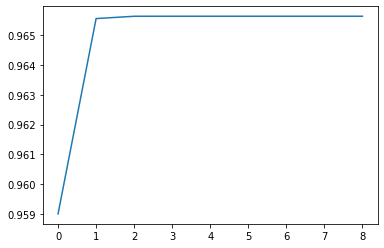

In [0]:
#plt.plot(range(len(valscore)),valscore)
plt.plot(range(len(valscore)),trainscore)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,model.predict(X_val))

13.586914253581465

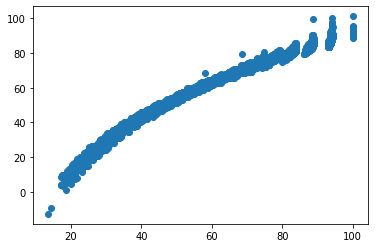

In [0]:
plt.scatter(y_val,model.predict(X_val))

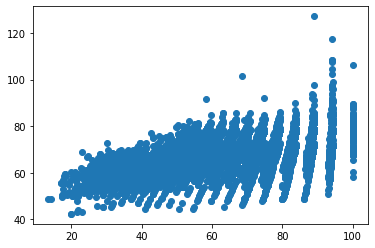

In [0]:
plt.scatter(y_val,model.predict(X_val))

In [0]:
model.coef_

array([ 7.95469555e-01,  4.56087184e-03,  1.55018796e+00, -8.19796140e+00,
       -3.48685240e+00, -1.44259471e+01, -4.26267956e+00])

In [0]:
model.coef_

array([ 3.72146073e+00, -1.64716118e-01, -3.66364083e+00, -9.89119823e-04,
        2.89604210e-01, -1.10662458e+00, -5.36018296e-01, -9.37992965e-01,
       -1.84916557e-01])

In [0]:
X_train.columns

Index(['DEWP', 'PRES', 'TEMP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW'], dtype='object')

In [0]:
X=X_train.drop(['PRES'],1)

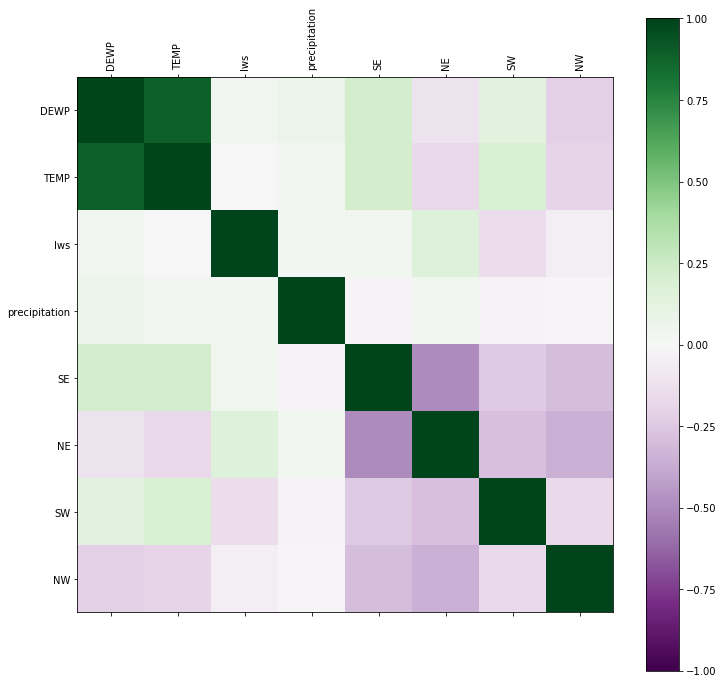

In [0]:
# Correlations among columns
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr(),interpolation='nearest',vmax=1,vmin=-1,cmap='PRGn')
# ax.title('corr', size=15)
ax.set_xticklabels(['']+list(X.columns), rotation=90)
ax.set_yticklabels(['']+list(X.columns))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.colorbar(cax)
plt.show()

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [0]:
vif

,VIF Factor,features
0,10.849437,DEWP
1,25.222329,PRES
2,21.531697,TEMP
3,1.471534,Iws
4,1.032230,precipitation
5,7.781939,SE
6,9.533472,NE
7,3.766982,SW
8,4.877122,NW


# Gaussian Process

In [0]:
df=pd.read_csv('/content/drive/My Drive/pTSAFinalProject/ShanghaiPM20100101_20151231.csv')
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [0]:
train_df=train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
train_df['precipitation']=train_df['precipitation'].fillna(0)
mean=train_df['PRES'].mean()
train_df['PRES']= train_df['PRES'].fillna(mean)
train_df['SE']=np.array(train_df['cbwd']=='SE').astype(int)
train_df['NE']=np.array(train_df['cbwd']=='NE').astype(int)
train_df['SW']=np.array(train_df['cbwd']=='SW').astype(int)
train_df['NW']=np.array(train_df['cbwd']=='NW').astype(int)
train_df=train_df.drop(['cbwd'],1)
train_df=train_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(train_df['DEWP'])):
  value=train_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['DEWP'][end])==True:
      end+=1
    if np.isnan(train_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+train_df['DEWP'][end])/2
    else:
      fill=(train_df['DEWP'][i-1]+train_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(train_df['Iws'])):
  value=train_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['Iws'][end])==True:
      end+=1
    if np.isnan(train_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+train_df['Iws'][end])/2
    else:
      fill=(train_df['Iws'][i-1]+train_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(train_df['HUMI'])):
  value=train_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['HUMI'][end])==True:
      end+=1
    if np.isnan(train_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+train_df['HUMI'][end])/2
    else:
      fill=(train_df['HUMI'][i-1]+train_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

train_df['DEWP']=np.array(dewplist)
train_df['Iws']=np.array(iwslist)
train_df['HUMI']=np.array(humilist)

In [0]:
val_df=val_df.reset_index(drop=True)

In [0]:
val_df=val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
val_df['precipitation']=val_df['precipitation'].fillna(0)
mean=val_df['PRES'].mean()
val_df['PRES']= val_df['PRES'].fillna(mean)
val_df['SE']=np.array(val_df['cbwd']=='SE').astype(int)
val_df['NE']=np.array(val_df['cbwd']=='NE').astype(int)
val_df['SW']=np.array(val_df['cbwd']=='SW').astype(int)
val_df['NW']=np.array(val_df['cbwd']=='NW').astype(int)
val_df=val_df.drop(['cbwd'],1)
val_df=val_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(val_df['DEWP'])):
  value=val_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['DEWP'][end])==True:
      end+=1
    if np.isnan(val_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+val_df['DEWP'][end])/2
    else:
      fill=(val_df['DEWP'][i-1]+val_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(val_df['Iws'])):
  value=val_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['Iws'][end])==True:
      end+=1
    if np.isnan(val_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+val_df['Iws'][end])/2
    else:
      fill=(val_df['Iws'][i-1]+val_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(val_df['HUMI'])):
  value=val_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['HUMI'][end])==True:
      end+=1
    if np.isnan(val_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+val_df['HUMI'][end])/2
    else:
      fill=(val_df['HUMI'][i-1]+val_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

val_df['DEWP']=np.array(dewplist)
val_df['Iws']=np.array(iwslist)
val_df['HUMI']=np.array(humilist)

In [0]:
test_df=test_df.reset_index(drop=True)

In [0]:
test_df=test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
test_df['precipitation']=test_df['precipitation'].fillna(0)
mean=test_df['PRES'].mean()
test_df['PRES']= test_df['PRES'].fillna(mean)
test_df['SE']=np.array(test_df['cbwd']=='SE').astype(int)
test_df['NE']=np.array(test_df['cbwd']=='NE').astype(int)
test_df['SW']=np.array(test_df['cbwd']=='SW').astype(int)
test_df['NW']=np.array(test_df['cbwd']=='NW').astype(int)
test_df=test_df.drop(['cbwd'],1)
test_df=test_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(test_df['DEWP'])):
  value=test_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['DEWP'][end])==True:
      end+=1
    if np.isnan(test_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+test_df['DEWP'][end])/2
    else:
      fill=(test_df['DEWP'][i-1]+test_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(test_df['Iws'])):
  value=test_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['Iws'][end])==True:
      end+=1
    if np.isnan(test_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+test_df['Iws'][end])/2
    else:
      fill=(test_df['Iws'][i-1]+test_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(test_df['HUMI'])):
  value=test_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['HUMI'][end])==True:
      end+=1
    if np.isnan(test_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+test_df['HUMI'][end])/2
    else:
      fill=(test_df['HUMI'][i-1]+test_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

test_df['DEWP']=np.array(dewplist)
test_df['Iws']=np.array(iwslist)
test_df['HUMI']=np.array(humilist)

In [0]:
train_df = train_df['HUMI']

In [0]:
len(train_df)

39408

In [0]:
val_df = val_df['HUMI']

In [0]:
import statsmodels as sm
arma_mod = sm.tsa.arima_model.ARIMA(train_df,(2,0,1)).fit(disp = False)
print(arma_mod.params)

const         68.700187
ar.L1.HUMI     1.725353
ar.L2.HUMI    -0.758226
ma.L1.HUMI    -0.582315
dtype: float64


In [0]:
pred = arma_mod.predict(39408, 39408+10)

In [0]:
len(pred)

31

(65, 100)

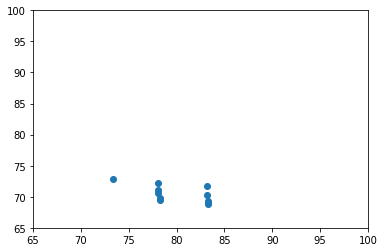

In [0]:
plt.scatter(val_df[:11],pred)
plt.xlim([65,100])
plt.ylim([65,100])

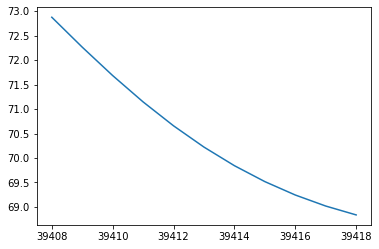

In [0]:
plt.plot(pred)


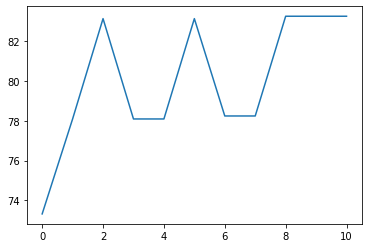

In [0]:
plt.plot(val_df[:11])

In [0]:
!pip install pyramid.arima

     |████████████████████████████████| 604kB 8.5MB/s 


In [0]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_df, start_p=1, start_q=1,
                           max_p=1, max_q=1, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
stepwise_model.fit(train_df)

KeyboardInterrupt: ignored

KeyError: ignored

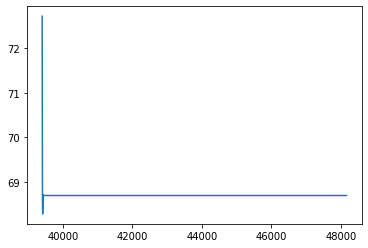

In [0]:
plt.plot(pred)

In [0]:
select = [i for i in range(0,39408,10)]
gp_df_train = train_df.loc[select]


In [0]:
gp_df_train.head()

,DEWP,Iws,precipitation,HUMI,SE,NE,SW,NW
0,-6.0,1.0,0.0,59.48,0,0,0,0
10,-1.0,28.0,0.0,60.76,1,0,0,0
20,2.0,20.0,0.0,65.82,1,0,0,0
30,3.0,1.0,0.0,81.06,0,0,0,1
40,2.0,30.0,0.0,50.36,0,0,0,1


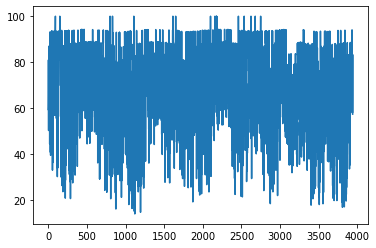

In [0]:
plt.plot(range(len(gp_df_train['HUMI'])),gp_df_train['HUMI'])

In [0]:
X_train = gp_df_train[['DEWP','Iws','precipitation','SE','NE','SW','NW']]
y_train = gp_df_train['HUMI']

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler(with_mean=True,with_std = True)
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(gp_df_train)
val_data_normalized = scaler.transform(val_df)
train_data_normalized = pd.DataFrame(train_data_normalized, columns = gp_df_train.columns)
val_data_normalized = pd.DataFrame(val_data_normalized, columns = gp_df_train.columns)
test_data_normalized = scaler.transform(test_df)
test_data_normalized = pd.DataFrame(test_data_normalized, columns = gp_df_train.columns)

In [0]:
train_data_normalized

,DEWP,Iws,precipitation,HUMI,SE,NE,SW,NW
0,0.306122,0.000912,0.00000,0.528234,0.0,0.0,0.0,0.0
1,0.408163,0.025524,0.00000,0.543137,1.0,0.0,0.0,0.0
2,0.469388,0.018232,0.00000,0.602049,1.0,0.0,0.0,0.0
3,0.489796,0.000912,0.00000,0.779485,0.0,0.0,0.0,1.0
4,0.469388,0.027347,0.00000,0.422051,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3936,0.836735,0.041021,0.00000,0.804983,0.0,0.0,1.0,0.0
3937,0.795918,0.009116,0.00000,0.510187,0.0,0.0,1.0,0.0
3938,0.816327,0.040109,0.00000,0.597276,0.0,0.0,1.0,0.0
3939,0.857143,0.001823,0.00487,0.806380,0.0,0.0,1.0,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler(with_mean=True,with_std = True)
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_df)
val_data_normalized = scaler.transform(val_df)
test_data_normalized = scaler.transform(test_df)
train_data_normalized = pd.DataFrame(train_data_normalized, columns = train_df.columns)
val_data_normalized = pd.DataFrame(val_data_normalized, columns = train_df.columns)
test_data_normalized = pd.DataFrame(test_data_normalized, columns = train_df.columns)


In [0]:
X_train = train_data_normalized[['DEWP','Iws','precipitation','SE','NE','SW','NW']]
y_train = train_data_normalized['HUMI']
X_val = val_data_normalized[['DEWP','Iws','precipitation','SE','NE','SW','NW']]
y_val = val_data_normalized['HUMI']
X_test = test_data_normalized[['DEWP','Iws','precipitation','SE','NE','SW','NW']]
y_test = test_data_normalized['HUMI']

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
# alpha_list = [0.1]
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel,ExpSineSquared
# kernel_list = [ExpSineSquared]
best_acc = 0
best_alpha = 0
best_kernel = None
kernel = ConstantKernel(1.0, (1e-1, 1e3)) * RBF(10.0, (1e-3, 1e3))
# for alpha in alpha_list:
#   for kernel in kernel_list:
gpr = GaussianProcessRegressor(kernel=kernel)
# time = np.arange(1,len(y_train)+1).reshape(-1,1)
gpr.fit(X_train,y_train)
acc = gpr.score(X_val,y_val)
# pred = gpr.sample_y(X_val)
print('Accuracy: ', acc)
mean = gpr.predict(X_val,return_std=False)
print(mean_squared_error(y_val,mean))

# if acc>best_acc:
#   best_acc = acc
#   best_kernel = kernel
#   best_alpha = alpha
#   print(acc)

# gpr = GaussianProcessRegressor(kernel = best_kernel,alpha = best_alpha)
# gpr.fit(new_X_train,y_train)
# mus, sigmas = gpr.predict(new_X_test, return_std=True)


/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.85073665e+08, -5.28982002e-22]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 83, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


Accuracy:  -0.12109356641397162
1.1690424886948547


In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
# alpha_list = [0.1]
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel,ExpSineSquared
# kernel_list = [ExpSineSquared]
best_acc = 0
best_alpha = 0
best_kernel = None
kernel = ConstantKernel(1.0, (1e-1, 1e3)) * RBF(10.0, (1e-3, 1e3))
# for alpha in alpha_list:
#   for kernel in kernel_list:
gpr = GaussianProcessRegressor(kernel=kernel)
# time = np.arange(1,len(y_train)+1).reshape(-1,1)
gpr.fit(X_train,y_train)
acc = gpr.score(X_test,y_test)
# pred = gpr.sample_y(X_val)
print('Accuracy: ', acc)
mean = gpr.predict(X_test,return_std=False)
print(mean_squared_error(y_test,mean))

# if acc>best_acc:
#   best_acc = acc
#   best_kernel = kernel
#   best_alpha = alpha
#   print(acc)

# gpr = GaussianProcessRegressor(kernel = best_kernel,alpha = best_alpha)
# gpr.fit(new_X_train,y_train)
# mus, sigmas = gpr.predict(new_X_test, return_std=True)


Accuracy:  -6.040325492078957
0.24724559597539839


# Real linear regression 

In [0]:
# no temp no pres
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
c_list = [0.0001,0.001,0.01,0.1,1,10,15,20]
best_acc = 0
best_c = 0
for c in c_list:
  lr = LinearRegression(c)
  lr.fit(X_train,y_train)
  # acc = lr.score(new_X_val,y_val)
  pred_tr = lr.predict(X_train)
  pred = lr.predict(X_val)
  print(mean_squared_error(y_val,pred))
  acc_tr = mean_squared_error(y_train,pred_tr)
  acc = mean_squared_error(y_val,pred)
  print('train mse: ', acc_tr, ' , val mse: ', acc)
  if acc>best_acc:
    best_acc = acc
    best_c = c

NameError: ignored

In [0]:
#keep pres
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
c_list = [0,0.0001,0.001,0.01,0.1,1,10,15,20]
best_acc = 0
best_c = 0
train_mse_list = []
val_mse_list = []
for c in c_list:
  lr = Ridge(c,normalize = False)
  lr.fit(X_train,y_train)
  # acc = lr.score(new_X_val,y_val)
  pred_tr = lr.predict(X_train)
  pred = lr.predict(X_val)
  acc = mean_squared_error(y_val,pred)
  acc_tr = mean_squared_error(y_train,pred_tr)
  print('train mse: ', acc_tr, ' , val mse: ', acc)
  train_mse_list.append(acc_tr)
  val_mse_list.append(acc)
  if acc>best_acc:
    best_acc = acc
    best_c = c
lr = Ridge(best_c,normalize = True)
lr.fit(X_train,y_train)
# acc = lr.score(new_X_test,y_test)
pred = lr.predict(X_test)
acc = mean_squared_error(y_test,pred)

print('MSE: ', acc)


train mse:  0.03080376125141  , val mse:  0.029574130727116645
train mse:  0.030803761251435923  , val mse:  0.02957413250749784
train mse:  0.030803761254001638  , val mse:  0.029574148531655173
train mse:  0.030803761510161648  , val mse:  0.029574308844929023
train mse:  0.03080378672054647  , val mse:  0.02957591891743785
train mse:  0.030805949904034062  , val mse:  0.029592514709175507
train mse:  0.030877132359754034  , val mse:  0.029741180118769563
train mse:  0.030912482511895  , val mse:  0.029800197580617957
train mse:  0.030940877956217222  , val mse:  0.029847745841150106
MSE:  0.036021704612388586


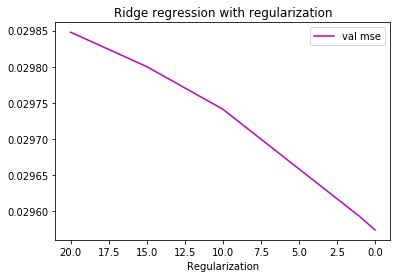

In [0]:
# plt.plot(c_list,train_mse_list,'--')
plt.plot(c_list,val_mse_list,'-',label = 'val mse',c = 'm')
plt.title('Ridge regression with regularization')
plt.xlabel('Regularization')
plt.xlim([21,-1])
plt.legend()
plt.show()

Text(0, 0.5, 'pred')

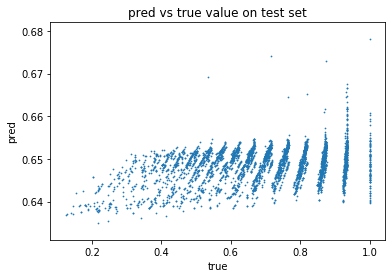

In [0]:
plt.scatter(y_test,pred,s=0.5)
plt.title('pred vs true value on test set')
plt.xlabel('true')
plt.ylabel('pred')

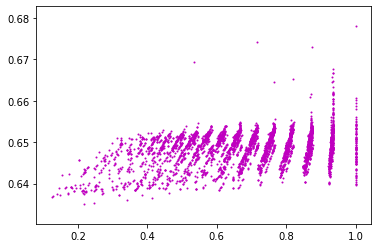

In [0]:
plt.scatter(y_test,pred,s=1,c = 'm')

In [0]:
max(y_train)

31.318426795229627

# LSTM NO feature

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [0]:
df=pd.read_csv('/content/drive/My Drive/pTSAFinalProject/ShanghaiPM20100101_20151231.csv')
#df=df[df['HUMI'].notnull()]
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
train_df=train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
train_df['precipitation']=train_df['precipitation'].fillna(0)
mean=train_df['PRES'].mean()
train_df['PRES']= train_df['PRES'].fillna(mean)
train_df['SE']=np.array(train_df['cbwd']=='SE').astype(int)
train_df['NE']=np.array(train_df['cbwd']=='NE').astype(int)
train_df['SW']=np.array(train_df['cbwd']=='SW').astype(int)
train_df['NW']=np.array(train_df['cbwd']=='NW').astype(int)
train_df=train_df.drop(['cbwd'],1)
train_df=train_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(train_df['DEWP'])):
  value=train_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['DEWP'][end])==True:
      end+=1
    if np.isnan(train_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+train_df['DEWP'][end])/2
    else:
      fill=(train_df['DEWP'][i-1]+train_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(train_df['Iws'])):
  value=train_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['Iws'][end])==True:
      end+=1
    if np.isnan(train_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+train_df['Iws'][end])/2
    else:
      fill=(train_df['Iws'][i-1]+train_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(train_df['HUMI'])):
  value=train_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['HUMI'][end])==True:
      end+=1
    if np.isnan(train_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+train_df['HUMI'][end])/2
    else:
      fill=(train_df['HUMI'][i-1]+train_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

train_df['DEWP']=np.array(dewplist)
train_df['Iws']=np.array(iwslist)
train_df['HUMI']=np.array(humilist)

In [0]:
val_df=val_df.reset_index(drop=True)

In [0]:
val_df=val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
val_df['precipitation']=val_df['precipitation'].fillna(0)
mean=val_df['PRES'].mean()
val_df['PRES']= val_df['PRES'].fillna(mean)
val_df['SE']=np.array(val_df['cbwd']=='SE').astype(int)
val_df['NE']=np.array(val_df['cbwd']=='NE').astype(int)
val_df['SW']=np.array(val_df['cbwd']=='SW').astype(int)
val_df['NW']=np.array(val_df['cbwd']=='NW').astype(int)
val_df=val_df.drop(['cbwd'],1)
val_df=val_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(val_df['DEWP'])):
  value=val_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['DEWP'][end])==True:
      end+=1
    if np.isnan(val_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+val_df['DEWP'][end])/2
    else:
      fill=(val_df['DEWP'][i-1]+val_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(val_df['Iws'])):
  value=val_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['Iws'][end])==True:
      end+=1
    if np.isnan(val_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+val_df['Iws'][end])/2
    else:
      fill=(val_df['Iws'][i-1]+val_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(val_df['HUMI'])):
  value=val_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['HUMI'][end])==True:
      end+=1
    if np.isnan(val_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+val_df['HUMI'][end])/2
    else:
      fill=(val_df['HUMI'][i-1]+val_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

val_df['DEWP']=np.array(dewplist)
val_df['Iws']=np.array(iwslist)
val_df['HUMI']=np.array(humilist)

In [0]:
test_df=test_df.reset_index(drop=True)

In [0]:
test_df=test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
test_df['precipitation']=test_df['precipitation'].fillna(0)
mean=test_df['PRES'].mean()
test_df['PRES']= test_df['PRES'].fillna(mean)
test_df['SE']=np.array(test_df['cbwd']=='SE').astype(int)
test_df['NE']=np.array(test_df['cbwd']=='NE').astype(int)
test_df['SW']=np.array(test_df['cbwd']=='SW').astype(int)
test_df['NW']=np.array(test_df['cbwd']=='NW').astype(int)
test_df=test_df.drop(['cbwd'],1)
test_df=test_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(test_df['DEWP'])):
  value=test_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['DEWP'][end])==True:
      end+=1
    if np.isnan(test_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+test_df['DEWP'][end])/2
    else:
      fill=(test_df['DEWP'][i-1]+test_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(test_df['Iws'])):
  value=test_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['Iws'][end])==True:
      end+=1
    if np.isnan(test_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+test_df['Iws'][end])/2
    else:
      fill=(test_df['Iws'][i-1]+test_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(test_df['HUMI'])):
  value=test_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['HUMI'][end])==True:
      end+=1
    if np.isnan(test_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+test_df['HUMI'][end])/2
    else:
      fill=(test_df['HUMI'][i-1]+test_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

test_df['DEWP']=np.array(dewplist)
test_df['Iws']=np.array(iwslist)
test_df['HUMI']=np.array(humilist)

In [0]:
train_df=train_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
val_df=val_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
test_df=test_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_df)

In [0]:
val_data_normalized = scaler.transform(val_df)
test_data_normalized = scaler.transform(test_df)

In [0]:
# reference: machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
	# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg
 
train = series_to_supervised(train_data_normalized, 1, 1)
val = series_to_supervised(val_data_normalized, 1, 1)
test = series_to_supervised(test_data_normalized, 1, 1)

# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

In [0]:
train.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.543076,0.306122,0.000901,0.0,0.0,0.0,0.0,0.0,0.543076,0.306122,0.001802,0.0,1.0,0.0,0.0,0.0
2,0.543076,0.306122,0.001802,0.0,1.0,0.0,0.0,0.0,0.540032,0.285714,0.003604,0.0,1.0,0.0,0.0,0.0
3,0.540032,0.285714,0.003604,0.0,1.0,0.0,0.0,0.0,0.593369,0.306122,0.004505,0.0,1.0,0.0,0.0,0.0
4,0.593369,0.306122,0.004505,0.0,1.0,0.0,0.0,0.0,0.593369,0.306122,0.007207,0.0,1.0,0.0,0.0,0.0
5,0.593369,0.306122,0.007207,0.0,1.0,0.0,0.0,0.0,0.540032,0.285714,0.009910,0.0,1.0,0.0,0.0,0.0


In [0]:
train.drop(train.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
val.drop(val.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
test.drop(test.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [0]:
train.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.543076,0.306122,0.000901,0.0,0.0,0.0,0.0,0.0,0.543076
2,0.543076,0.306122,0.001802,0.0,1.0,0.0,0.0,0.0,0.540032
3,0.540032,0.285714,0.003604,0.0,1.0,0.0,0.0,0.0,0.593369
4,0.593369,0.306122,0.004505,0.0,1.0,0.0,0.0,0.0,0.593369
5,0.593369,0.306122,0.007207,0.0,1.0,0.0,0.0,0.0,0.540032


In [0]:
train.drop(train.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
val.drop(val.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
test.drop(test.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)

In [0]:
train_X, train_y = train.values[:, :-1], train.values[:, -1]
val_X, val_y = val.values[:, :-1], val.values[:, -1]
test_X, test_y=test.values[:, :-1], test.values[:, -1]

In [0]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, dropout=0.2, num_layer=2, output_size=1,batch_size=64):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_layer_size, num_layers=num_layer,dropout=dropout,batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        # self.hidden_cell = (torch.zeros(num_layer,batch_size,self.hidden_layer_size),
        #                     torch.zeros(num_layer,batch_size,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, _= self.lstm(input_seq.view(len(input_seq) ,1, -1))
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        # predictions = self.linear(lstm_out)
        return predictions

In [0]:
num_gpus = torch.cuda.device_count()
if num_gpus > 0:
    current_device = 'cuda'
else:
    current_device = 'cpu'

In [0]:
epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64

In [0]:
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
# hyperparameter tuning: hidden size
dropout_list = [0.2]
h_train_loss=[]
h_val_loss=[]
h_test_loss=[]
for dropout in dropout_list:
  model = LSTM(hidden_layer_size=128,num_layer=1,dropout=dropout).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  test_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))

    test_loss_cache=0
    for s in range(num_batches_test):
      seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        test_loss = loss_function(y_pred.view(-1), labels.view(-1))
      test_loss_cache+=test_loss
    test_loss_hist.append(test_loss_cache.item()/(num_batches_test*len(seq)))

    print('dropout: ',dropout,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i],'test loss: ',test_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)
  h_test_loss.append(test_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


dropout:  0.2 epoch:  0  valid loss:  0.0035503552678753346 train loss:  0.02411304240387569 test loss:  0.0033318610752330106
dropout:  0.2 epoch:  1  valid loss:  0.003526653437053456 train loss:  0.003593240703959624 test loss:  0.003304632709306829
dropout:  0.2 epoch:  2  valid loss:  0.003492283689625123 train loss:  0.003581962867912541 test loss:  0.003271569443099639
dropout:  0.2 epoch:  3  valid loss:  0.0034701320178368513 train loss:  0.0035741352429802765 test loss:  0.0032530508058912612
dropout:  0.2 epoch:  4  valid loss:  0.0034697086495511674 train loss:  0.0035684956370179003 test loss:  0.003250360269756878
dropout:  0.2 epoch:  5  valid loss:  0.003472047474454431 train loss:  0.0035545341254068098 test loss:  0.003250452087205999
dropout:  0.2 epoch:  6  valid loss:  0.0034764010240049925 train loss:  0.003552480667405497 test loss:  0.003252489382729811
dropout:  0.2 epoch:  7  valid loss:  0.0034806577160077937 train loss:  0.0035609525951132846 test loss:  0.0

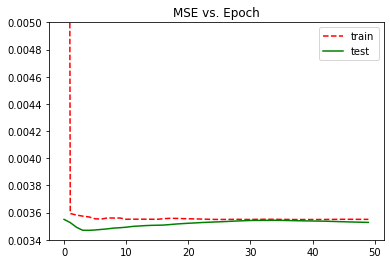

In [0]:
c = ['r','g']
for i in range(1):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train')
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i+1],label = 'test')
  plt.title('MSE vs. Epoch')
  plt.ylim([0.0034,0.005])
  plt.legend(loc='best')

plt.show()

In [0]:
min(min(h_val_loss)) #epoch 4

0.0034627175944692947

In [0]:
# hyperparameter tuning: hidden size
hidden_sizes=[128]
h_train_loss=[]
h_val_loss=[]
for hidden in hidden_sizes:
  model = LSTM(hidden_layer_size=hidden,num_layer=1,dropout=0.2).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('h: ',hidden,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


h:  32 epoch:  0  valid loss:  0.003514210529187146 train loss:  0.049777491061713516
h:  32 epoch:  1  valid loss:  0.00350513616028954 train loss:  0.003565336049844821
h:  32 epoch:  2  valid loss:  0.0035024892319651213 train loss:  0.0035571997110709183
h:  32 epoch:  3  valid loss:  0.0035041881834759433 train loss:  0.0035510300447581323
h:  32 epoch:  4  valid loss:  0.0035057999193668365 train loss:  0.003547507999427011
h:  32 epoch:  5  valid loss:  0.0035084643784691304 train loss:  0.003545307917936849
h:  32 epoch:  6  valid loss:  0.0035114384749356437 train loss:  0.003543572887168758
h:  32 epoch:  7  valid loss:  0.003514353185892105 train loss:  0.003542520570553597
h:  32 epoch:  8  valid loss:  0.0035169904722886927 train loss:  0.003542268398403364
h:  32 epoch:  9  valid loss:  0.0035193941610700942 train loss:  0.0035419695828927725
h:  32 epoch:  10  valid loss:  0.003521483391523361 train loss:  0.0035417420084482227
h:  32 epoch:  11  valid loss:  0.003523175

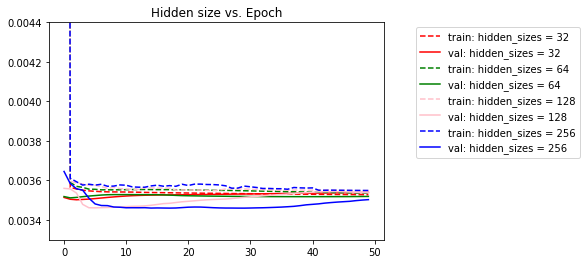

In [0]:
c = ['r','g','pink','b']
for i in range(4):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train: hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'val: hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.title('Hidden size vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.6, 0))
  plt.ylim([0.0033,0.0044])

plt.show()

# LSTM LAG=1

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [0]:
df=pd.read_csv('/content/drive/My Drive/pTSAFinalProject/ShanghaiPM20100101_20151231.csv')
#df=df[df['HUMI'].notnull()]
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
train_df=train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
train_df['precipitation']=train_df['precipitation'].fillna(0)
mean=train_df['PRES'].mean()
train_df['PRES']= train_df['PRES'].fillna(mean)
train_df['SE']=np.array(train_df['cbwd']=='SE').astype(int)
train_df['NE']=np.array(train_df['cbwd']=='NE').astype(int)
train_df['SW']=np.array(train_df['cbwd']=='SW').astype(int)
train_df['NW']=np.array(train_df['cbwd']=='NW').astype(int)
train_df=train_df.drop(['cbwd'],1)
train_df=train_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(train_df['DEWP'])):
  value=train_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['DEWP'][end])==True:
      end+=1
    if np.isnan(train_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+train_df['DEWP'][end])/2
    else:
      fill=(train_df['DEWP'][i-1]+train_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(train_df['Iws'])):
  value=train_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['Iws'][end])==True:
      end+=1
    if np.isnan(train_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+train_df['Iws'][end])/2
    else:
      fill=(train_df['Iws'][i-1]+train_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(train_df['HUMI'])):
  value=train_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['HUMI'][end])==True:
      end+=1
    if np.isnan(train_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+train_df['HUMI'][end])/2
    else:
      fill=(train_df['HUMI'][i-1]+train_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

train_df['DEWP']=np.array(dewplist)
train_df['Iws']=np.array(iwslist)
train_df['HUMI']=np.array(humilist)

In [0]:
val_df=val_df.reset_index(drop=True)

In [0]:
val_df=val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
val_df['precipitation']=val_df['precipitation'].fillna(0)
mean=val_df['PRES'].mean()
val_df['PRES']= val_df['PRES'].fillna(mean)
val_df['SE']=np.array(val_df['cbwd']=='SE').astype(int)
val_df['NE']=np.array(val_df['cbwd']=='NE').astype(int)
val_df['SW']=np.array(val_df['cbwd']=='SW').astype(int)
val_df['NW']=np.array(val_df['cbwd']=='NW').astype(int)
val_df=val_df.drop(['cbwd'],1)
val_df=val_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(val_df['DEWP'])):
  value=val_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['DEWP'][end])==True:
      end+=1
    if np.isnan(val_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+val_df['DEWP'][end])/2
    else:
      fill=(val_df['DEWP'][i-1]+val_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(val_df['Iws'])):
  value=val_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['Iws'][end])==True:
      end+=1
    if np.isnan(val_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+val_df['Iws'][end])/2
    else:
      fill=(val_df['Iws'][i-1]+val_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(val_df['HUMI'])):
  value=val_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['HUMI'][end])==True:
      end+=1
    if np.isnan(val_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+val_df['HUMI'][end])/2
    else:
      fill=(val_df['HUMI'][i-1]+val_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

val_df['DEWP']=np.array(dewplist)
val_df['Iws']=np.array(iwslist)
val_df['HUMI']=np.array(humilist)

In [0]:
test_df=test_df.reset_index(drop=True)

In [0]:
test_df=test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
test_df['precipitation']=test_df['precipitation'].fillna(0)
mean=test_df['PRES'].mean()
test_df['PRES']= test_df['PRES'].fillna(mean)
test_df['SE']=np.array(test_df['cbwd']=='SE').astype(int)
test_df['NE']=np.array(test_df['cbwd']=='NE').astype(int)
test_df['SW']=np.array(test_df['cbwd']=='SW').astype(int)
test_df['NW']=np.array(test_df['cbwd']=='NW').astype(int)
test_df=test_df.drop(['cbwd'],1)
test_df=test_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(test_df['DEWP'])):
  value=test_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['DEWP'][end])==True:
      end+=1
    if np.isnan(test_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+test_df['DEWP'][end])/2
    else:
      fill=(test_df['DEWP'][i-1]+test_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(test_df['Iws'])):
  value=test_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['Iws'][end])==True:
      end+=1
    if np.isnan(test_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+test_df['Iws'][end])/2
    else:
      fill=(test_df['Iws'][i-1]+test_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(test_df['HUMI'])):
  value=test_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['HUMI'][end])==True:
      end+=1
    if np.isnan(test_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+test_df['HUMI'][end])/2
    else:
      fill=(test_df['HUMI'][i-1]+test_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

test_df['DEWP']=np.array(dewplist)
test_df['Iws']=np.array(iwslist)
test_df['HUMI']=np.array(humilist)

In [0]:
# def collate_fn(batch):
#     # batch is a list of sample tuples
#     input_list = [s[:-1] for s in batch]
#     target_list = [s[-1] for s in batch]
#     return input_list, target_list

In [0]:
train_df[train_df.isna().any(axis=1)]

,DEWP,Iws,precipitation,HUMI,SE,NE,SW,NW


In [0]:
train_df=train_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
val_df=val_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
test_df=test_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_df)

In [0]:
val_data_normalized = scaler.transform(val_df)
test_data_normalized = scaler.transform(test_df)

In [0]:
# reference: machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
	# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg
 
train = series_to_supervised(train_data_normalized, 1, 1)
val = series_to_supervised(val_data_normalized, 1, 1)
test = series_to_supervised(test_data_normalized, 1, 1)

# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

In [0]:
train.drop(train.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
val.drop(val.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
test.drop(test.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [0]:
train_X, train_y = train.values[:, :-1], train.values[:, -1]
val_X, val_y = val.values[:, :-1], val.values[:, -1]
test_X, test_y=test.values[:, :-1], test.values[:, -1]

In [0]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [0]:
train_X.shape

(39407, 1, 8)

In [0]:
val_X.shape

(8759, 1, 8)

In [0]:
test_X.shape

(4415, 1, 8)

## LSTM Class

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=8, hidden_layer_size=100, dropout=0.2, num_layer=2, output_size=1,batch_size=64):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_layer_size, num_layers=num_layer,dropout=dropout,batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        # self.hidden_cell = (torch.zeros(num_layer,batch_size,self.hidden_layer_size),
        #                     torch.zeros(num_layer,batch_size,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, _= self.lstm(input_seq.view(len(input_seq) ,1, -1))
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        # predictions = self.linear(lstm_out)
        return predictions

In [0]:
num_gpus = torch.cuda.device_count()
if num_gpus > 0:
    current_device = 'cuda'
else:
    current_device = 'cpu'

In [0]:
epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64

In [0]:
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
# hyperparameter tuning: hidden size
dropout_list = [0.2]
h_train_loss=[]
h_val_loss=[]
h_test_loss=[]
for dropout in dropout_list:
  model = LSTM(hidden_layer_size=128,num_layer=1,dropout=dropout).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  test_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))

    test_loss_cache=0
    for s in range(num_batches_test):
      seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        test_loss = loss_function(y_pred.view(-1), labels.view(-1))
      test_loss_cache+=test_loss
    test_loss_hist.append(test_loss_cache.item()/(num_batches_test*len(seq)))

    print('dropout: ',dropout,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i],'test loss: ',test_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)
  h_test_loss.append(test_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


dropout:  0.2 epoch:  0  valid loss:  0.0041516291744568765 train loss:  0.02992200092866835 test loss:  0.0037899740478571724
dropout:  0.2 epoch:  1  valid loss:  0.0034911610624369454 train loss:  0.003640370762422378 test loss:  0.0033025226610548354
dropout:  0.2 epoch:  2  valid loss:  0.0034361838856164146 train loss:  0.003552347940877383 test loss:  0.0032556035062846016
dropout:  0.2 epoch:  3  valid loss:  0.0034224971690598655 train loss:  0.0035544728341595673 test loss:  0.0032371758099864513
dropout:  0.2 epoch:  4  valid loss:  0.0034165866672992706 train loss:  0.003541923800627209 test loss:  0.0032342878334662493
dropout:  0.2 epoch:  5  valid loss:  0.003408004036721061 train loss:  0.003554251022652034 test loss:  0.003227832781917909
dropout:  0.2 epoch:  6  valid loss:  0.0034314503564554103 train loss:  0.0035270252637943722 test loss:  0.0032356247744139504
dropout:  0.2 epoch:  7  valid loss:  0.0034278304699589222 train loss:  0.003529640337891453 test loss: 

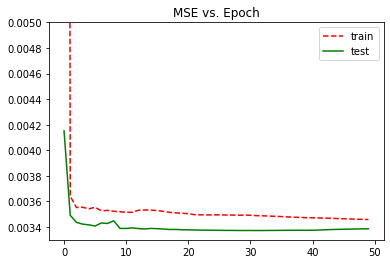

In [0]:
c = ['r','g']
for i in range(1):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train')
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i+1],label = 'test')
  plt.title('MSE vs. Epoch')
  plt.ylim([0.0033,0.005])
  plt.legend(loc='best')

plt.show()

In [0]:
np.sqrt(0.0032494390273795407)

0.05700385098727577

In [0]:
np.sqrt(0.0031928139574387495)


0.0565049905533905

In [0]:
min(min(h_val_loss)) #epoch 28

0.00337094024700277

## New Dropout = [0.1,0.2,0.3] choose 0.2

In [0]:
# hyperparameter tuning: hidden size
dropout_list = [0.1,0.2,0.3]
h_train_loss=[]
h_val_loss=[]
for dropout in dropout_list:
  model = LSTM(hidden_layer_size=128,num_layer=2,dropout=dropout).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('dropout: ',dropout,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

dropout:  0.1 epoch:  0  valid loss:  0.004035122254315545 train loss:  0.017954051723453875
dropout:  0.1 epoch:  1  valid loss:  0.003479339401511585 train loss:  0.0039979093679703955
dropout:  0.1 epoch:  2  valid loss:  0.0037542879581451416 train loss:  0.0037966152651205173
dropout:  0.1 epoch:  3  valid loss:  0.003749061156721676 train loss:  0.0037546791986191297
dropout:  0.1 epoch:  4  valid loss:  0.00359552024918444 train loss:  0.0037339881986258477
dropout:  0.1 epoch:  5  valid loss:  0.003470621564809014 train loss:  0.0036873793880629344
dropout:  0.1 epoch:  6  valid loss:  0.0036696395015015323 train loss:  0.0036643049437401257
dropout:  0.1 epoch:  7  valid loss:  0.00367297648507006 train loss:  0.003641543164659988
dropout:  0.1 epoch:  8  valid loss:  0.003484100103378296 train loss:  0.003636520955431449
dropout:  0.1 epoch:  9  valid loss:  0.003459450734012267 train loss:  0.003642711262464735
dropout:  0.1 epoch:  10  valid loss:  0.0034775183919598072 tra

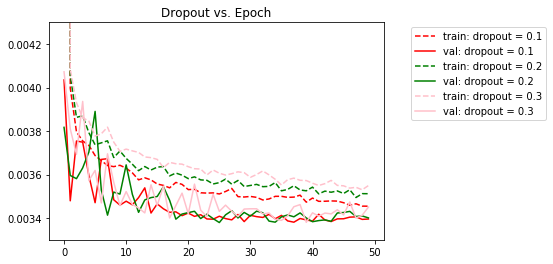

In [0]:
c = ['r','g','pink']
for i in range(3):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train: dropout = {}'.format(dropout_list[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'val: dropout = {}'.format(dropout_list[i]))
  plt.title('Dropout vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  plt.ylim([0.0033,0.0043])
  

plt.show()

In [0]:
h_train_loss

[[0.017954051723453875,
  0.0039979093679703955,
  0.0037966152651205173,
  0.0037546791986191297,
  0.0037339881986258477,
  0.0036873793880629344,
  0.0036643049437401257,
  0.003641543164659988,
  0.003636520955431449,
  0.003642711262464735,
  0.0036294539021782396,
  0.0036079834275916825,
  0.003575723721623057,
  0.0035850672825519752,
  0.0035756217360276943,
  0.0035565279020995993,
  0.0035502254728197566,
  0.003539008862903054,
  0.0035639125078621254,
  0.0035548296062336343,
  0.003530881486878526,
  0.0035324487647768565,
  0.003516219710321658,
  0.003514736903286198,
  0.003515821203544009,
  0.003510747387876537,
  0.0035221588342617136,
  0.0035362080437116084,
  0.003498558956955567,
  0.003496772201345643,
  0.0034994396405688267,
  0.0034952888355166386,
  0.003483135517255017,
  0.003487832689226219,
  0.0034999457623324987,
  0.003500021670327893,
  0.0034951171551914355,
  0.003496379931116613,
  0.0035053211593682448,
  0.003473123578862022,
  0.00349208405601

In [0]:
h_val_loss

[[0.004035122254315545,
  0.003479339401511585,
  0.0037542879581451416,
  0.003749061156721676,
  0.00359552024918444,
  0.003470621564809014,
  0.0036696395015015323,
  0.00367297648507006,
  0.003484100103378296,
  0.003459450734012267,
  0.0034775183919598072,
  0.0034609756925526786,
  0.0034941108349491566,
  0.003538868663942113,
  0.0034231670639094185,
  0.0034651708076981935,
  0.0034425195087404814,
  0.0034262989373768076,
  0.003428610589574365,
  0.0034110866048756767,
  0.0034231721040080577,
  0.0034078118555686053,
  0.003415391287382911,
  0.0033958280349479,
  0.003394683713422102,
  0.003408394315663506,
  0.0033975256716503818,
  0.003391713999650058,
  0.003416425165008096,
  0.0033837291685973898,
  0.0034127103931763593,
  0.0034065448185976815,
  0.0034028692718814403,
  0.0034170168287613813,
  0.0033966767437317792,
  0.0034123260308714476,
  0.0033868538106189053,
  0.0033810020369641923,
  0.0033978964476024404,
  0.0033914736088584453,
  0.0033859419910346

## New num_layers = [1,2,3] choose 1

In [0]:
# hyperparameter tuning: hidden size
num_layer_list = [1,2,3]
h_train_loss=[]
h_val_loss=[]
for num_layer in num_layer_list:
  model = LSTM(hidden_layer_size=128,num_layer=num_layer,dropout=0.2).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('num_layers: ',num_layer,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


num_layers:  1 epoch:  0  valid loss:  0.003922013237195856 train loss:  0.023692588233843265
num_layers:  1 epoch:  1  valid loss:  0.0034739493447191573 train loss:  0.0035893754102289677
num_layers:  1 epoch:  2  valid loss:  0.0034310107722001918 train loss:  0.003569873633730127
num_layers:  1 epoch:  3  valid loss:  0.0034158122451866373 train loss:  0.003541869980214936
num_layers:  1 epoch:  4  valid loss:  0.003407776355743408 train loss:  0.0035435043799698475
num_layers:  1 epoch:  5  valid loss:  0.0034173683208577775 train loss:  0.003529868356323218
num_layers:  1 epoch:  6  valid loss:  0.003438138129080043 train loss:  0.0035249922505004435
num_layers:  1 epoch:  7  valid loss:  0.0034575986073297612 train loss:  0.0035209901984856744
num_layers:  1 epoch:  8  valid loss:  0.0034157429986140307 train loss:  0.003517918518415039
num_layers:  1 epoch:  9  valid loss:  0.003391207141034743 train loss:  0.003515697718783456
num_layers:  1 epoch:  10  valid loss:  0.00338723

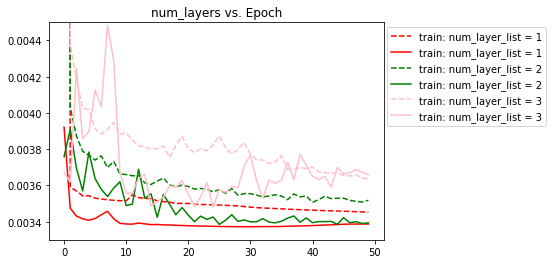

In [0]:
c = ['r','g','pink']
for i in range(3):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train: num_layer_list = {}'.format(num_layer_list[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'train: num_layer_list = {}'.format(num_layer_list[i]))
  plt.title('num_layers vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  plt.ylim([0.0033,0.0045])

plt.show()

In [0]:
h_train_loss

[[0.023692588233843265,
  0.0035893754102289677,
  0.003569873633730127,
  0.003541869980214936,
  0.0035435043799698475,
  0.003529868356323218,
  0.0035249922505004435,
  0.0035209901984856744,
  0.003517918518415039,
  0.003515697718783456,
  0.0035147961562241965,
  0.0035479129547616693,
  0.003533063955582315,
  0.0035286486135583705,
  0.0035269905029364475,
  0.0035153373165389265,
  0.0035105159992685282,
  0.003507565820922818,
  0.003500727657039415,
  0.0035013447901824624,
  0.0035003161599208425,
  0.0034966966069144446,
  0.0034945887693287273,
  0.003494155977481628,
  0.003492797314514959,
  0.003491895616327117,
  0.0034905886695894405,
  0.00348900485655096,
  0.0034867880667173645,
  0.003483581667996913,
  0.0034804229060475663,
  0.0034775444533585048,
  0.00347548309018896,
  0.0034741440968686426,
  0.003472515980228479,
  0.0034708206215305483,
  0.003469088481837596,
  0.0034676773519050786,
  0.003466210098240555,
  0.0034648154371955653,
  0.0034635332138542

In [0]:
h_val_loss

[[0.003922013237195856,
  0.0034739493447191573,
  0.0034310107722001918,
  0.0034158122451866373,
  0.003407776355743408,
  0.0034173683208577775,
  0.003438138129080043,
  0.0034575986073297612,
  0.0034157429986140307,
  0.003391207141034743,
  0.003387234885902966,
  0.0033864959636155296,
  0.003392510554369758,
  0.0033878936048816234,
  0.0033838380785549387,
  0.0033846368246218737,
  0.003382268416530946,
  0.003381923717610976,
  0.003379834706292433,
  0.0033788709517787487,
  0.003377661108970642,
  0.003376723869758494,
  0.003375618335078744,
  0.003375098547514747,
  0.0033744258039137896,
  0.0033736169776495766,
  0.003373072208727107,
  0.0033727110747028798,
  0.0033724382519721985,
  0.0033723223297034994,
  0.003372326054993798,
  0.0033724608228487126,
  0.0033727676114615273,
  0.0033730478847728055,
  0.003373258254107307,
  0.003373696961823632,
  0.003374542821856106,
  0.0033754215520970963,
  0.0033763471771689024,
  0.0033772984410033505,
  0.00337845612974

## New learning rate = [0.0005, 0.001,0.01] choose 0.001

In [0]:
|# hyperparameter tuning: hidden size
lr_list =  [0.0005, 0.001,0.01]
h_train_loss=[]
h_val_loss=[]
for lr in lr_list:
  model = LSTM(hidden_layer_size=128,num_layer=1,dropout=0.2).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('learning rates: ',lr,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


learning rates:  0.0005 epoch:  0  valid loss:  0.005404542912455166 train loss:  0.04989128021856513
learning rates:  0.0005 epoch:  1  valid loss:  0.003945910317056319 train loss:  0.0037227724974111813
learning rates:  0.0005 epoch:  2  valid loss:  0.003575782565509572 train loss:  0.003564617211922882
learning rates:  0.0005 epoch:  3  valid loss:  0.0035176838145536534 train loss:  0.0035183997636441355
learning rates:  0.0005 epoch:  4  valid loss:  0.003485509358784732 train loss:  0.003504475019493602
learning rates:  0.0005 epoch:  5  valid loss:  0.0034666304640910204 train loss:  0.00349852257650497
learning rates:  0.0005 epoch:  6  valid loss:  0.003454948830253938 train loss:  0.0034939854897982708
learning rates:  0.0005 epoch:  7  valid loss:  0.0034446494982523076 train loss:  0.003490033010266933
learning rates:  0.0005 epoch:  8  valid loss:  0.0034352740382446964 train loss:  0.0034869413217151067
learning rates:  0.0005 epoch:  9  valid loss:  0.00342741389484966

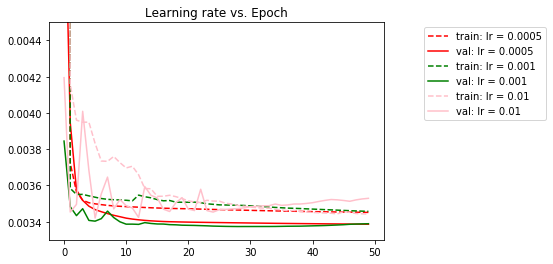

In [0]:
c = ['r','g','pink']
for i in range(3):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train: lr = {}'.format(lr_list[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'val: lr = {}'.format(lr_list[i]))
  plt.title('Learning rate vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  plt.ylim([0.0033,0.0045])

plt.show()

In [0]:
h_train_loss

[[0.04989128021856513,
  0.0037227724974111813,
  0.003564617211922882,
  0.0035183997636441355,
  0.003504475019493602,
  0.00349852257650497,
  0.0034939854897982708,
  0.003490033010266933,
  0.0034869413217151067,
  0.003484875741187574,
  0.0034831126548948025,
  0.0034815656184029532,
  0.003479998479445836,
  0.003478280937950301,
  0.0034767432403334272,
  0.003475489904271151,
  0.003474417630189318,
  0.003473339759369903,
  0.00347255133717071,
  0.0034718779806327833,
  0.00347113599167849,
  0.003470297268690254,
  0.003469410992503863,
  0.0034685063927351097,
  0.0034676031531326898,
  0.0034667046176557375,
  0.0034658642004933055,
  0.0034650167363233925,
  0.0034641668200492857,
  0.0034633216292907793,
  0.003462515805840371,
  0.0034617326922745,
  0.0034609600766259056,
  0.00346023455712702,
  0.0034595198466487957,
  0.00345882171787685,
  0.0034581594488098913,
  0.003457509535762322,
  0.0034568619484657316,
  0.003456238168859627,
  0.0034556323848854054,
  0.

In [0]:
h_val_loss

[[0.005404542912455166,
  0.003945910317056319,
  0.003575782565509572,
  0.0035176838145536534,
  0.003485509358784732,
  0.0034666304640910204,
  0.003454948830253938,
  0.0034446494982523076,
  0.0034352740382446964,
  0.003427413894849665,
  0.003419533371925354,
  0.0034143365919589996,
  0.0034103266456547905,
  0.003407158834092757,
  0.003404616433031419,
  0.0034025789183728837,
  0.0034009546918027543,
  0.003399823299225639,
  0.0033990013248780195,
  0.003398226245361216,
  0.0033975791405229006,
  0.0033970118007239174,
  0.0033965001211446874,
  0.003395996111280778,
  0.0033955227802781496,
  0.0033950590912033528,
  0.0033945844453923844,
  0.0033941027872702654,
  0.003393644138294108,
  0.003393185051048503,
  0.0033927244298598345,
  0.003392269944443422,
  0.003391825539224288,
  0.0033913850784301758,
  0.0033909546978333417,
  0.0033905556535019595,
  0.003390186849762412,
  0.003389841055168825,
  0.0033894998624044307,
  0.0033891588887747597,
  0.00338881725774

# Evaluation (in the order noteboook

In [0]:
model.eval()
test_loss_cache=0
for s in range(num_batches_test+1):
    seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      y_pred = model(seq)
      test_loss = loss_function(y_pred, labels)
    test_loss_cache+=test_loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([63])) that is different to the input size (torch.Size([63, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [0]:
test_loss_cache/(num_batches_test+1)

tensor(0.0311, device='cuda:0')

In [0]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

In [0]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

# LSTM - LARGER LAG (In the order notebook)

In [0]:
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)

In [0]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [0]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]